In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import pickle

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Data-Science-ML-Capstone-Projects-master/loan_prediction.csv')

In [ ]:
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
dataframe.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
dataframe.dropna(subset=['Loan_Status'], inplace = True)

In [ ]:
le = preprocessing.LabelEncoder()
dataframe['Loan_Status'] = le.fit_transform(dataframe['Loan_Status'])

Turning Label Of Loan_Status into integer values

In [ ]:
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


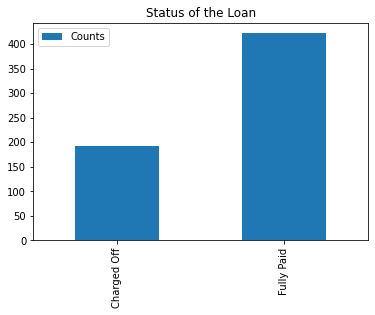

In [ ]:
coffvalue = dataframe[dataframe['Loan_Status'] == 0]['Loan_Status'].count()
fpaidvalue = dataframe[dataframe['Loan_Status'] == 1]['Loan_Status'].count()
data = {"Counts":[coffvalue, fpaidvalue] }
statusDF = pd.DataFrame(data, index=["Charged Off", "Fully Paid"])
# statusDF.head()
statusDF.plot(kind='bar', title="Status of the Loan")

In [ ]:
print("Value counts for each term: \n",dataframe['Loan_Amount_Term'].value_counts())
print("Missing data in loan term:",dataframe['Loan_Amount_Term'].isna().sum())

Value counts for each term: 
 360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Missing data in loan term: 14


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 67.2+ KB


As You Can See there are Null Values In this dataset Which Need to Be Fill.

In [ ]:
dataframe['Gender']=dataframe['Gender'].fillna(method='pad')
dataframe['Married']=dataframe['Married'].fillna(method='pad')
dataframe['Dependents']=dataframe['Dependents'].fillna(method='pad')
dataframe['Self_Employed']=dataframe['Self_Employed'].fillna(method='pad')
dataframe['LoanAmount']=dataframe['LoanAmount'].fillna(dataframe['LoanAmount'].mean())
dataframe['Loan_Amount_Term']=dataframe['Loan_Amount_Term'].fillna(dataframe['Loan_Amount_Term'].mean())
dataframe['Credit_History']=dataframe['Credit_History'].fillna(dataframe['Credit_History'].mean())

Filing the Missing Values 

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 67.2+ KB


In [ ]:
print("Value counts for each term: \n",dataframe['Gender'].value_counts())
print("Value counts for each term: \n",dataframe['Married'].value_counts())
print("Value counts for each term: \n",dataframe['Dependents'].value_counts())
print("Value counts for each term: \n",dataframe['Education'].value_counts())
print("Value counts for each term: \n",dataframe['Self_Employed'].value_counts())

Value counts for each term: 
 Male      500
Female    114
Name: Gender, dtype: int64
Value counts for each term: 
 Yes    400
No     214
Name: Married, dtype: int64
Value counts for each term: 
 0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64
Value counts for each term: 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Value counts for each term: 
 No     528
Yes     86
Name: Self_Employed, dtype: int64


In [ ]:
dataframe.Gender= pd.factorize(dataframe.Gender)[0]
dataframe.Married= pd.factorize(dataframe.Married)[0]
dataframe.Dependents= pd.factorize(dataframe.Dependents)[0]
dataframe.Education= pd.factorize(dataframe.Education)[0]
dataframe.Self_Employed= pd.factorize(dataframe.Self_Employed)[0]

In [ ]:
print("Value counts for each term: \n",dataframe['Gender'].value_counts())
print("Value counts for each term: \n",dataframe['Married'].value_counts())
print("Value counts for each term: \n",dataframe['Dependents'].value_counts())
print("Value counts for each term: \n",dataframe['Education'].value_counts())
print("Value counts for each term: \n",dataframe['Self_Employed'].value_counts())

Value counts for each term: 
 0    500
1    114
Name: Gender, dtype: int64
Value counts for each term: 
 1    400
0    214
Name: Married, dtype: int64
Value counts for each term: 
 0    354
2    105
1    104
3     51
Name: Dependents, dtype: int64
Value counts for each term: 
 0    480
1    134
Name: Education, dtype: int64
Value counts for each term: 
 0    528
1     86
Name: Self_Employed, dtype: int64


In [ ]:
print("Value counts for each term: \n",dataframe['Property_Area'].value_counts())
dataframe.Property_Area= pd.factorize(dataframe.Property_Area)[0]
print("Value counts for each term: \n",dataframe['Property_Area'].value_counts())

Value counts for each term: 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Value counts for each term: 
 2    233
0    202
1    179
Name: Property_Area, dtype: int64


In [ ]:
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1


In [ ]:
dataframe.drop('Loan_ID',axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,1
610,0,1,3,0,0,4106,0.0,40.000000,180.0,1.0,1,1
611,0,1,1,0,0,8072,240.0,253.000000,360.0,1.0,0,1
612,0,1,2,0,0,7583,0.0,187.000000,360.0,1.0,0,1


In [ ]:
y=dataframe['Loan_Status']
X=dataframe[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

creating **Label and data** for Training 

In [ ]:
models = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]

In [ ]:
max_s=0
for r_s in range(40,90):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=r_s)
  for i in models:
    i.fit(X_train,y_train)
    pre=i.predict(X_test)
    r2_sc=accuracy_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

Apply Different Classifier and Taking Best Out of them.

In [ ]:
print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )

Max Score is  0.8861788617886179   For Random State  63  and model is  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
Model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=63)

In [ ]:
Model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=Model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8699186991869918


Final Accuracy Of Model

In [ ]:
filename = "Model_Loan_Status.pkl"
pickle.dump(Model, open(filename, 'wb'))

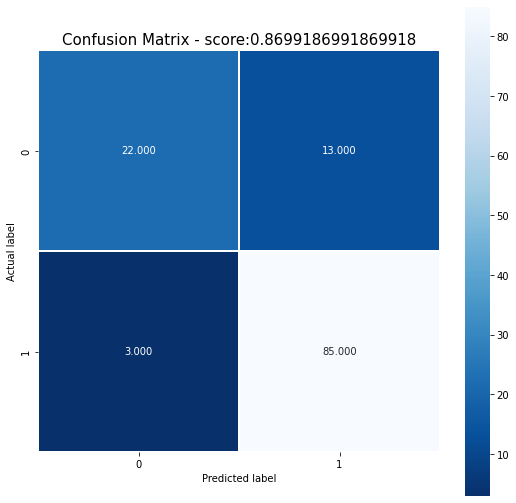

              precision    recall  f1-score   support

           0       0.88      0.63      0.73        35
           1       0.87      0.97      0.91        88

    accuracy                           0.87       123
   macro avg       0.87      0.80      0.82       123
weighted avg       0.87      0.87      0.86       123



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))